In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [8]:
df.shape

(1338, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [13]:
# as there's categorical column we will encode it with numbers

df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [28]:

from sklearn .preprocessing import LabelEncoder
lab_enc=LabelEncoder()
df["region"]=lab_enc.fit_transform(df['region'])
df["region"]

0       3
1       2
2       2
3       1
4       1
       ..
1333    1
1334    0
1335    2
1336    3
1337    1
Name: region, Length: 1338, dtype: int32

In [29]:
df["smoker"]=lab_enc.fit_transform(df['smoker'])
df["smoker"]

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int32

In [30]:
df["sex"]=lab_enc.fit_transform(df['sex'])
df["sex"]

0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex, Length: 1338, dtype: int32

In [31]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [32]:
 corr=df.corr()
corr

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


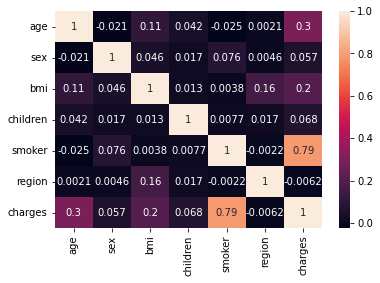

In [33]:
# heatmap
sns.heatmap(df.corr(), annot=True)
plt.show()

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

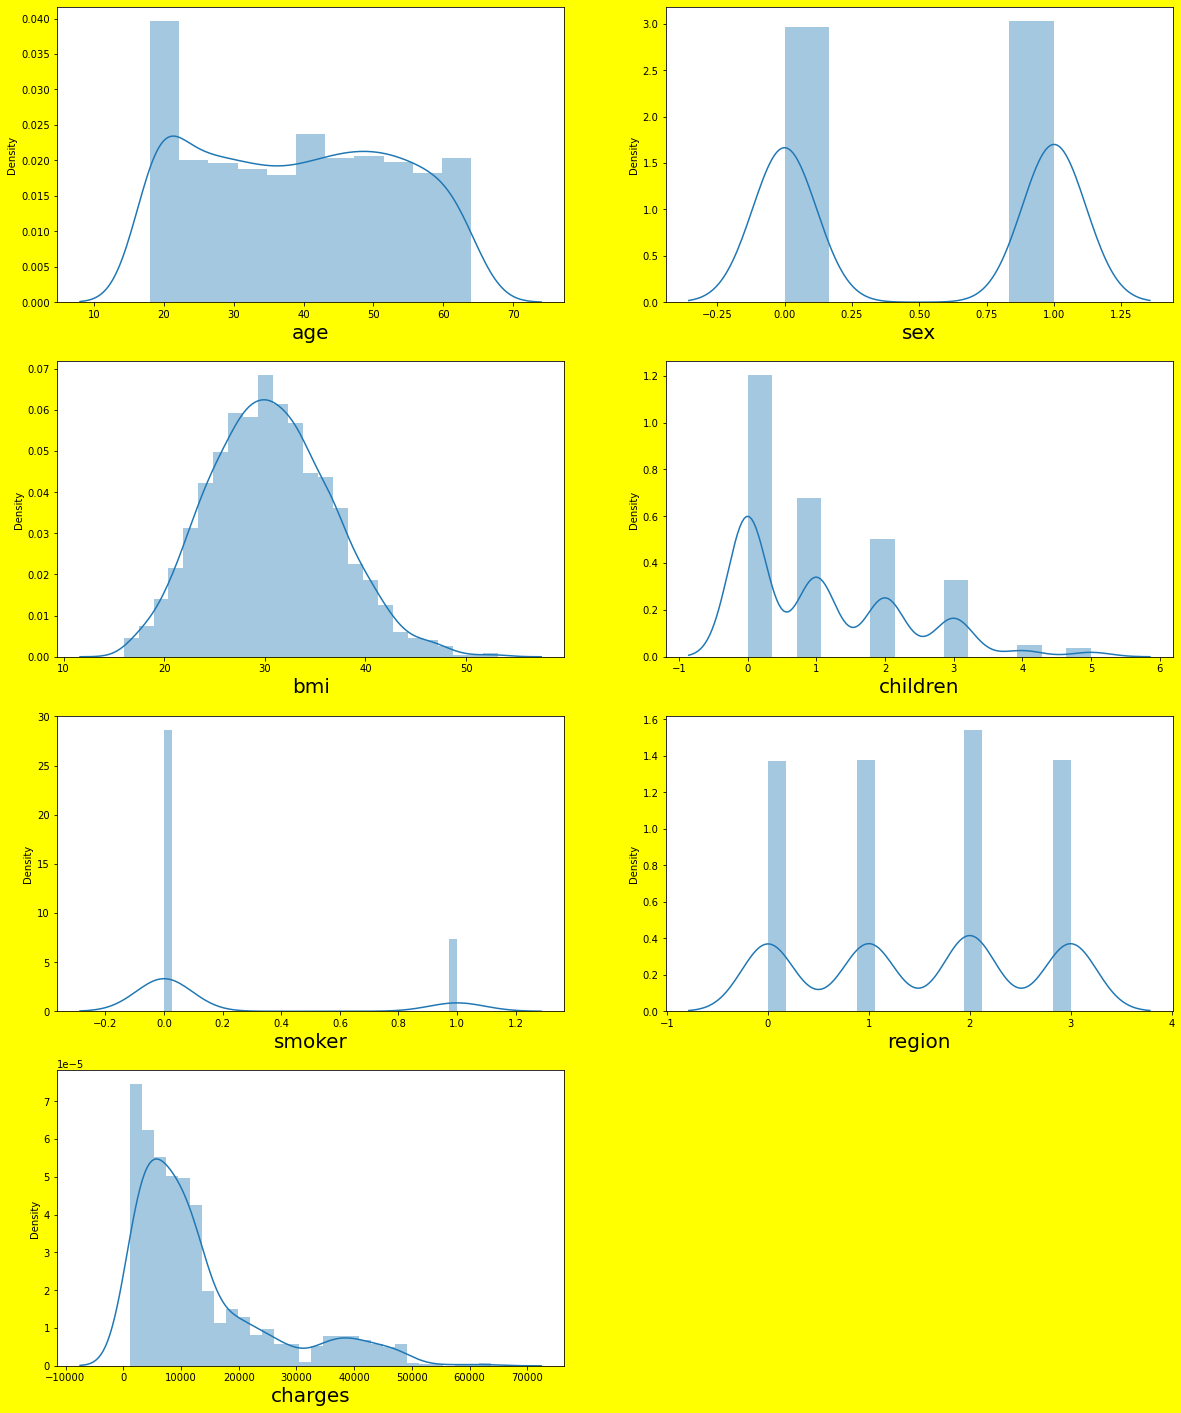

In [36]:
plt.figure(figsize=(20,25), facecolor='yellow')
plotnumber = 1
for column in df:
    if plotnumber<=7:
        ax=plt.subplot(4,2,plotnumber)
        sns.distplot(df[column]) 
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()     

<AxesSubplot:>

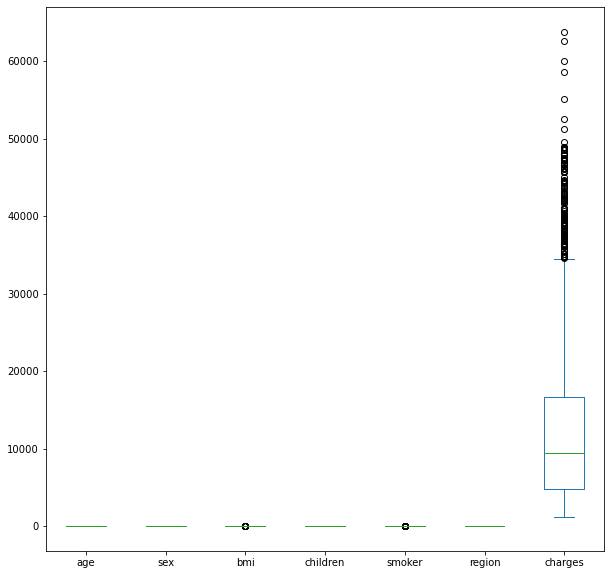

In [37]:
# to chk outliers
df.plot(kind='box',layout=(3,4),figsize=(10,10))

In [39]:
x=df.drop(columns=['charges'])
y=df['charges']

In [40]:
# scaling
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-1.43876426, -1.0105187 , -0.45332   , -0.90861367,  1.97058663,
         1.34390459],
       [-1.50996545,  0.98959079,  0.5096211 , -0.07876719, -0.5074631 ,
         0.43849455],
       [-0.79795355,  0.98959079,  0.38330685,  1.58092576, -0.5074631 ,
         0.43849455],
       ...,
       [-1.50996545, -1.0105187 ,  1.0148781 , -0.90861367, -0.5074631 ,
         0.43849455],
       [-1.29636188, -1.0105187 , -0.79781341, -0.90861367, -0.5074631 ,
         1.34390459],
       [ 1.55168573, -1.0105187 , -0.26138796, -0.90861367,  1.97058663,
        -0.46691549]])

In [42]:
X=x_scaled

In [43]:
# split for train & test
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=41)

In [44]:
y_train.head()

83     11033.66170
509    11455.28000
325     6600.20595
18     10602.38500
390    10736.87075
Name: charges, dtype: float64

In [45]:
lm=LinearRegression()

In [46]:
lm.fit(x_train,y_train)
      

LinearRegression()

In [47]:
lm.coef_

array([3654.32251847,   43.38518971, 2138.46787438,  538.06646428,
       9776.19488172, -520.69556461])

In [48]:
lm.intercept_

13422.26335495054

In [49]:
lm.score(x_train,y_train)

0.7575598110356404

In [50]:
# predict the values
pred=lm.predict(x_test)

In [51]:
print('predicted Price:-',pred)
print('Actual Price:-',y_test)

predicted Price:- [ 6.18026408e+03  1.22024667e+04  6.66863598e+03  9.44551903e+03
  1.03631363e+04  1.19652384e+04  2.85059735e+04  1.46204872e+04
  7.90615322e+03  5.62902077e+03  2.93446415e+04  1.35126875e+04
  1.77033919e+03  2.85368325e+04  6.05922891e+03  1.23211268e+04
  1.51123107e+04  9.33066989e+03  1.18897576e+04  3.49721283e+04
  8.25903966e+03  3.35189341e+04  1.17135836e+04  1.61539216e+04
  1.81342471e+04  1.22595570e+04  1.25978860e+04  4.23531758e+03
  7.92475088e+03  1.57399995e+04  9.23029800e+03  4.85417991e+03
  8.71074035e+03  1.38062060e+04  1.13476488e+04  2.82880947e+04
  1.20778004e+04  1.43609932e+04  7.85281197e+02  3.50888903e+04
  2.82898347e+04  3.42662000e+04  1.22968360e+04  1.43264232e+04
  7.63034464e+03  5.81566708e+03  6.25564753e+03  3.62008358e+04
  1.78211059e+04  6.47777807e+03  8.02395433e+02  4.28022744e+03
  1.11027071e+04  1.03811308e+04  4.91073452e+03  8.10117955e+03
  9.62190022e+03  1.08793731e+04  9.14251372e+03  1.54396301e+04
  1.274

In [53]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [58]:
print('error')
print ('mean Absolute Error:',mean_absolute_error,(y_test,pred))
print('mean_squared_error:',mean_squared_error(y_test,pred))
print('Root Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

error
mean Absolute Error: <function mean_absolute_error at 0x000001AA04FB90D0> (1083     4076.49700
1237    12224.35085
519      3857.75925
79       6571.02435
930      2927.06470
           ...     
230      7443.64305
1291    34828.65400
350     11830.60720
907      7633.72060
1327     9377.90470
Name: charges, Length: 335, dtype: float64, array([ 6.18026408e+03,  1.22024667e+04,  6.66863598e+03,  9.44551903e+03,
        1.03631363e+04,  1.19652384e+04,  2.85059735e+04,  1.46204872e+04,
        7.90615322e+03,  5.62902077e+03,  2.93446415e+04,  1.35126875e+04,
        1.77033919e+03,  2.85368325e+04,  6.05922891e+03,  1.23211268e+04,
        1.51123107e+04,  9.33066989e+03,  1.18897576e+04,  3.49721283e+04,
        8.25903966e+03,  3.35189341e+04,  1.17135836e+04,  1.61539216e+04,
        1.81342471e+04,  1.22595570e+04,  1.25978860e+04,  4.23531758e+03,
        7.92475088e+03,  1.57399995e+04,  9.23029800e+03,  4.85417991e+03,
        8.71074035e+03,  1.38062060e+04,  1.13476488e+0

In [59]:
from sklearn.metrics import r2_score
print('r2_score',(y_test,pred))

r2_score (1083     4076.49700
1237    12224.35085
519      3857.75925
79       6571.02435
930      2927.06470
           ...     
230      7443.64305
1291    34828.65400
350     11830.60720
907      7633.72060
1327     9377.90470
Name: charges, Length: 335, dtype: float64, array([ 6.18026408e+03,  1.22024667e+04,  6.66863598e+03,  9.44551903e+03,
        1.03631363e+04,  1.19652384e+04,  2.85059735e+04,  1.46204872e+04,
        7.90615322e+03,  5.62902077e+03,  2.93446415e+04,  1.35126875e+04,
        1.77033919e+03,  2.85368325e+04,  6.05922891e+03,  1.23211268e+04,
        1.51123107e+04,  9.33066989e+03,  1.18897576e+04,  3.49721283e+04,
        8.25903966e+03,  3.35189341e+04,  1.17135836e+04,  1.61539216e+04,
        1.81342471e+04,  1.22595570e+04,  1.25978860e+04,  4.23531758e+03,
        7.92475088e+03,  1.57399995e+04,  9.23029800e+03,  4.85417991e+03,
        8.71074035e+03,  1.38062060e+04,  1.13476488e+04,  2.82880947e+04,
        1.20778004e+04,  1.43609932e+04,  7.8528119

In [60]:
import pickle

In [61]:
filename='insurance charges_file.pkl'
pickle.dump('insurance charges',open(filename,'wb'))